# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an ~80/~20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Include transformations and interactions, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
6. Summarize your results from 1 to 5. Have you learned anything about overfitting and underfitting, or model selection?
7. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.



In [ ]:
# 1. Clean the data and perform some EDA and visualization to get to know the data set.
# 2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression


df = pd.read_csv('/content/cars_hw.csv')

In [45]:
df.head() # data seems pretty clean

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


In [7]:
df['Body_Type'].unique()

array(['sedan', 'crossover', 'suv', 'hatchback', 'muv'], dtype=object)

In [8]:
df.isnull().sum()

,0
Unnamed: 0,0
Make,0
Make_Year,0
Color,0
Body_Type,0
Mileage_Run,0
No_of_Owners,0
Seating_Capacity,0
Fuel_Type,0
Transmission,0


<Axes: >

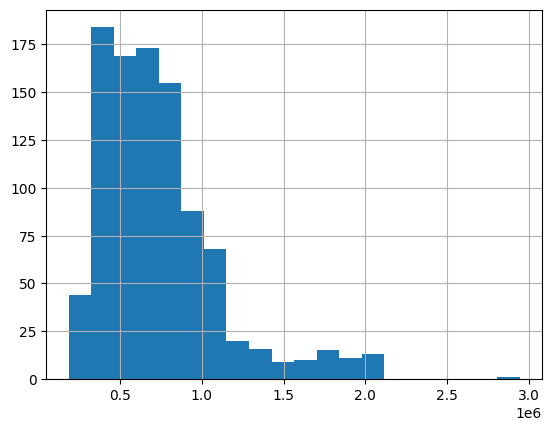

In [9]:
df['Price'].hist(bins=20)

In [10]:
df['price_ihs'] = np.arcsinh(df['Price'])

<Axes: >

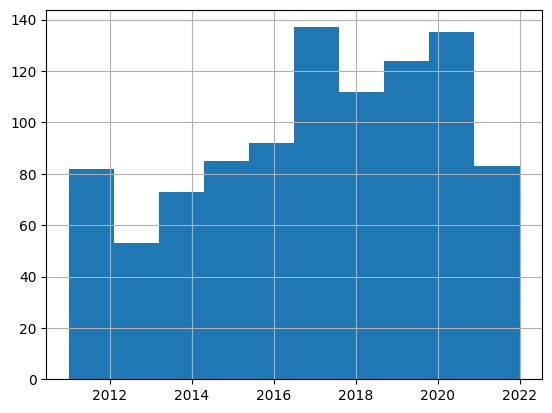

In [11]:
df['Make_Year'].hist()

<Axes: >

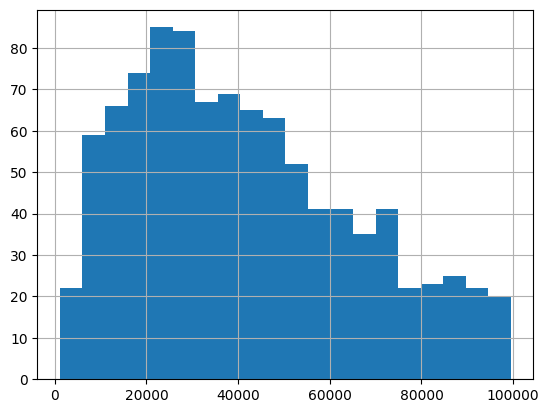

In [12]:
df['Mileage_Run'].hist(bins=20)

In [13]:
df['mileage_ihs'] = np.arcsinh(df['Mileage_Run'])

In [ ]:
# 3. Implement an 80/20 train-test split. Put the test data aside.

In [23]:
N = df.shape[0]
train_size = int(.8*N)

index = np.arange(N)
np.random.shuffle(index)

train_rows = index[:train_size]
test_rows = index[train_size:]

y = df['Price']
y_train = y.iloc[train_rows]
y_test = y.iloc[test_rows]

In [ ]:
# 4. Build some simple linear models that include no transformations or interactions.
# Fit them, and determine their RMSE and  𝑅2  on the both the training and test sets.
# Which of your models does the best?

In [24]:
# Model 1
dummies = pd.get_dummies( df.loc[:,'Make'], dtype=int)
X_train = dummies.iloc[train_rows,:]
X_test = dummies.iloc[test_rows,:]

reg = linear_model.LinearRegression(fit_intercept=False).fit(X_train,y_train)

# Rsq and RMSE
y_hat = reg.predict(X_test)
print('Rsq: ', reg.score(X_test,y_test))
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ) )
print('RMSE: ', rmse)

Rsq:  0.43682136141104233
RMSE:  272162.43626620754


In [25]:
# Model 2
dummies = pd.get_dummies( df.loc[:,'Body_Type'], dtype=int)
X_train = dummies.iloc[train_rows,:]
X_test = dummies.iloc[test_rows,:]

reg = linear_model.LinearRegression(fit_intercept=False).fit(X_train,y_train)

# Rsq and RMSE
y_hat = reg.predict(X_test)
print('Rsq: ', reg.score(X_test,y_test))
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ) )
print('RMSE: ', rmse)

Rsq:  0.45905487200805484
RMSE:  266736.0428394262


In [ ]:
# 5. Include transformations and interactions, and build a more complex model that reflects your ideas about how the
# features of the asset determine its value. Determine its RMSE and  𝑅2  on the training and test sets.
# How does the more complex model your build compare to the simpler ones?

In [26]:
# Split the data
N = df.shape[0]
df = df.sample(frac=1, random_state=100) # randomize the order in which data appears
train_size = int(.8*N)

df_train = df[0:train_size]
y_train = df_train['price_ihs']

df_test = df[train_size:]
y_test = df_test['price_ihs']

In [27]:
# Model 1
vars = ['Seating_Capacity','Make_Year','mileage_ihs'] # Select variables
X_train = df_train.loc[:,vars] # Process training covariates
reg = linear_model.LinearRegression().fit(X_train,y_train)
X_test = df_test.loc[:,vars] # Process test covariates
y_hat = reg.predict(X_test)
print('Rsq: ', reg.score(X_test,y_test))
rmse_n = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse_n)

Rsq:  0.45254262356327124
RMSE:  0.33392654735906374


In [28]:
# Model 2
vars2 = ['Make','Body_Type','Fuel_Type']

# Use a loop to make the dummy dataframe, but you could do it by hand in a bunch of lines:
dummies = pd.DataFrame([]) # In general, use lists and append instead of DataFrame and pd.concat
for var in vars2:
    new_dummies = pd.get_dummies( df.loc[:,var], drop_first=True, dtype=int)
    dummies = pd.concat([dummies, new_dummies], axis=1, ignore_index=True)
    X_train2 = dummies.iloc[0:train_size,:]
    X_test2 = dummies.iloc[train_size:,:]

reg2 = linear_model.LinearRegression().fit(X_train2,y_train)
y_hat2 = reg2.predict(X_test2)
print('Rsq: ', reg2.score(X_test2,y_test))
rmse_c = np.sqrt( np.mean( (y_test - y_hat2)**2 ))
print('RMSE: ', rmse_c)

Rsq:  0.6101498858856373
RMSE:  0.2817893816302918


In [29]:
# Model 3
X_train3 = pd.concat([X_train, X_train2],axis=1, ignore_index=True)
X_test3 = pd.concat([X_test, X_test2],axis=1, ignore_index=True)

reg3 = linear_model.LinearRegression().fit(X_train3,y_train)
y_hat3 = reg3.predict(X_test3)
print('All Rsq: ', reg3.score(X_test3,y_test))
rmse_all = np.sqrt( np.mean( (y_test - y_hat3)**2 ))
print('All RMSE: ', rmse_all)

# a lot better than the previous models!

All Rsq:  0.8044515344245183
All RMSE:  0.1995735568186383


In [ ]:
# 6. Summarize your results from 1 to 5. Have you learned anything about overfitting and underfitting, or model selection?

In [ ]:
# Out of the models that I created, the more variables I added the better the models got, especially when I used the transformed variables
# for price and mileage run. In part 4, my model has an extremely large RMSE value, meaning that the model is performing quite poorly/ not
# accurately predicting the outcome. When I included more variables/transformations in the model, the predictions became more accurate with the
# Rsq values getting closer to 1. My best model included Seating Capacity, Make Year, Mileage_ihs, Make, Body Type, and Fuel Type to predict
# price_ihs. The Rsq value was 0.804. The other models I made were underfit - too few variables were used in the model so it did not capture
# the complex relationships between the features and price. It is important to choose enough variables to build the model so that the relationship
# between the features and target variables are explained, but not too many variables to risk overfitting the data and getting a negative Rsq.